In [30]:
import quantum_drawer as qd
import quantum_imaging as qi

%matplotlib inline

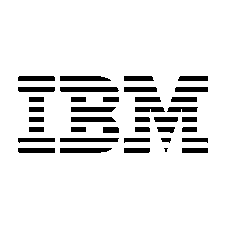

In [45]:
image_logo = qi.convert_to_bw("logo-ibm.png")
qi.image_from_array(image_logo)

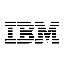

In [46]:
resized_image_logo = qi.resize_array(image_logo, size=(64, 64))
qi.image_from_array(resized_image_logo)

In [47]:
array_binary_logo = qi.binary_encode(resized_image_logo)
qi.save_bin_array_to_csv('quantum_ibm_logo.csv', array_binary_logo)

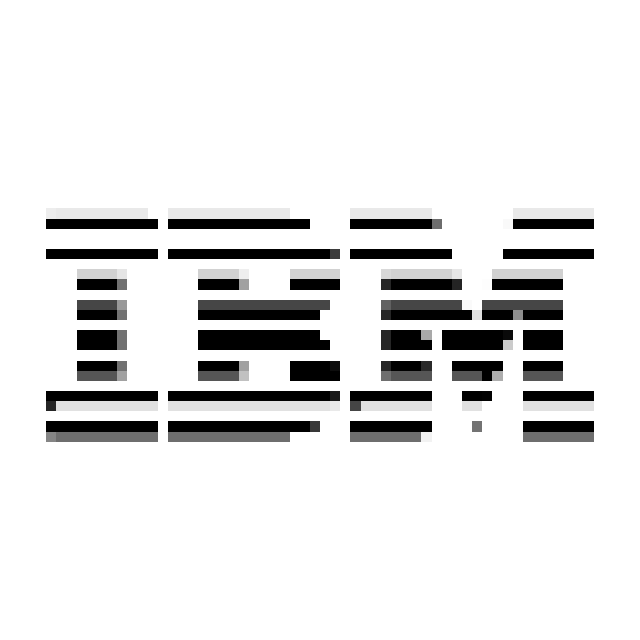

In [48]:
scaled_image_sim = qi.scale_binary_image(resized_image_logo, 10)
qi.image_from_array(scaled_image_sim)

# Use one-hot encoding drawing file to create a Quantum circuit and rebuild the image with the circuit result

# Only support square images (i.e: 32x32px, 64x64px)

In [49]:
# Simulator
qasm_sim = qd.get_quantum_simulator_backend("aer_simulator")

# Number of circuit qubits
n_qubits = 5

In [50]:
binary_data_array = qi.load_bin_array_from_csv('quantum_ibm_logo.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum(binary_data_array, cols_items, splitting, n_qubits, qasm_sim)
rework_image.shape

(64, 64)

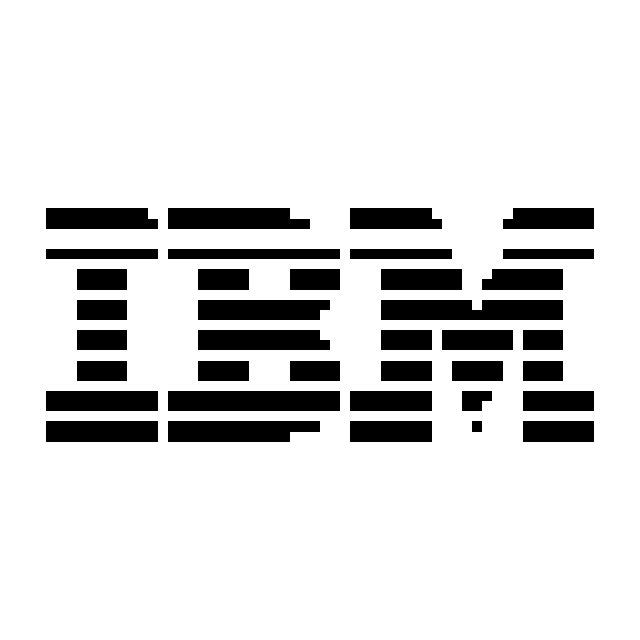

In [51]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 10)
qi.image_from_array(scaled_image)

# Sending circuit to real quantum computer

In [38]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

In [39]:
if not IBMQ.active_account():
    IBMQ.load_account()

all_providers = IBMQ.providers()

provider = all_providers[0] #IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [40]:
%qiskit_backend_overview

In [41]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n_qubits and b.status().operational and not b.configuration().simulator))

In [42]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [52]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
binary_data_array = qi.load_bin_array_from_csv('quantum_ibm_logo.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum(binary_data_array, cols_items, splitting, n_qubits, backend, num_shots = 1024)
rework_image.shape

In [ ]:
%qiskit_disable_job_watcher

In [ ]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 10)
qi.image_from_array(scaled_image)